In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [15]:
df = pd.read_csv('../data_final/data.csv')
display(df)

,RideEstimativeID,RideID,ProductID,WaitingTime,Price,Selected,Fee,ProviderID,CategoryID,Description,...,lead_time_ratio,trips_per_hour,trips_per_weekday,same_city,same_state,month,season,effective_distance,distance_time_efficiency,adjusted_speed_pico
0,8619946,1183200,Flash,8,89.00,False,0.0,2,10,Flash,...,-0.001842,186193,330621,0,1,8,2,21.306472,9802.059812,9802.06
1,8619947,1183200,UberX,6,89.00,False,0.0,2,2,UberX,...,-0.001842,186193,330621,0,1,8,2,21.306472,9802.059812,9802.06
2,8619948,1183200,Comfort,10,116.50,False,0.0,2,9,Comfort,...,-0.001842,186193,330621,0,1,8,2,21.306472,9802.059812,9802.06
3,8619949,1183200,poupa99,5,170.21,False,0.0,3,2,99POUPA,...,-0.001842,186193,330621,0,1,8,2,21.306472,9802.059812,9802.06
4,8619950,1183200,pop99,7,170.21,False,0.0,3,2,99POP,...,-0.001842,186193,330621,0,1,8,2,21.306472,9802.059812,9802.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,10620896,1425244,Black,3,62.00,False,0.0,2,4,Black,...,-0.003972,100706,330621,0,1,6,2,8.237544,2021.786630,2021.79
1999996,10620897,1425244,Bag,10,58.50,False,0.0,2,9,Bag,...,-0.003972,100706,330621,0,1,6,2,8.237544,2021.786630,2021.79
1999997,10620898,1425244,Black Bag,3,75.50,False,0.0,2,8,Black Bag,...,-0.003972,100706,330621,0,1,6,2,8.237544,2021.786630,2021.79
1999998,10620899,1425244,pop99,7,39.56,False,0.0,3,2,99POP,...,-0.003972,100706,330621,0,1,6,2,8.237544,2021.786630,2021.79


Correlação

In [16]:
# Calcular correlação com 'Price'
correlation = df.corr(numeric_only=True)['Price'].sort_values(ascending=False)

# Visualizar as maiores correlações
print(correlation)

Price                        1.000000
effective_distance           0.934033
distance_km                  0.934025
distance_pico                0.485345
ProviderID                   0.057286
RideStatusID                 0.031076
WaitingTime                  0.029589
RideEstimativeID             0.026273
RideID                       0.025468
origem_RideID                0.025468
destino_RideID               0.025468
destino_RideAddressID        0.025454
origem_RideAddressID         0.025454
horario_pico                 0.022224
week_pico                    0.017985
TotalUsers                   0.008535
CompanyID                    0.007071
delta_schedule_create        0.006142
CategoryID                   0.005883
origem_Lng                   0.003904
fim_de_semana                0.002842
weekday                      0.002175
destino_Lng                  0.002161
periodo                      0.002021
delta_schedule_updated       0.001439
travel_time_seconds          0.001438
delta_create

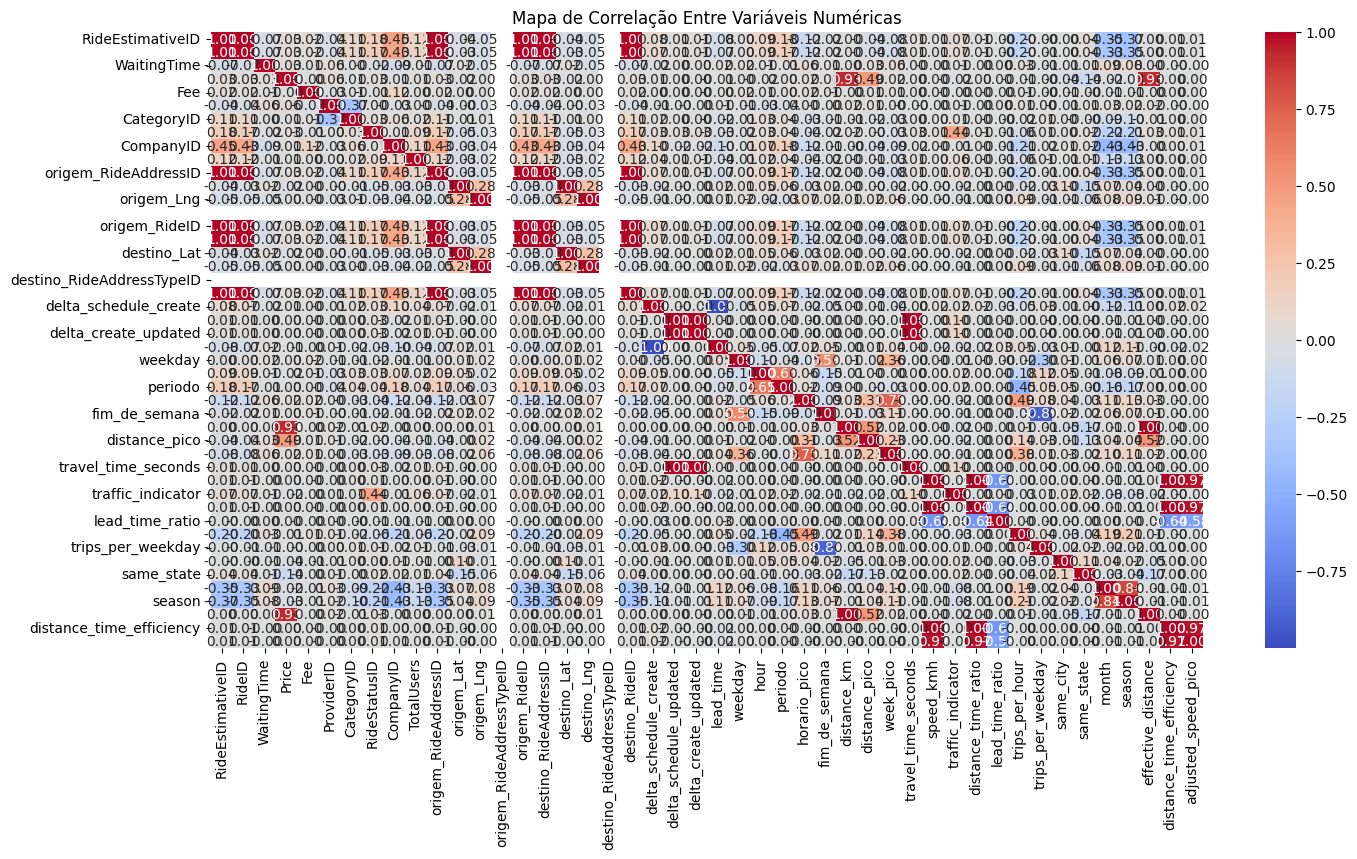

In [17]:
# Filtrando apenas colunas numéricas
numericas = df.select_dtypes(include=['float64', 'int64'])

# Matriz de correlação
corr = numericas.corr()

# Plot do heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Mapa de Correlação Entre Variáveis Numéricas')
plt.show()

## Modelo

## Uber

------- Uber -------- ProviderID = 2 ------- 

ProductID únicos: ['ACCESS' 'Bag' 'Berline' 'Bike Rack' 'Black' 'Black Bag' 'BlackBag' 'BlackSUV' 'CentralBlack' 'CentralComfort' 'CentralComfortPlanet' 'CentralFlash' 'CentralFlash+' 'CentralFlashMoto' 'CentralPrioridade' 'CentralUberEspereeEconomize' 'CentralUberPlanet' 'CentralUberX' 'CentralVIP' 'Comfort' 'Comfort Planet' 'ComfortAeropuerto' 'ComfortElectric' 'ComfortPlanet' 'Economy' 'Essential' 'Flash' 'Flash Bikes' 'Flash Moto' 'Flash Saver' 'Flash+' 'FlashEconomize' 'FlashMoto' 'Green' 'JUMP Scooter' 'Moto' 'Moto Flash' 'Premier' 'Prioridade' 'Priority' 'Priroidade' 'PTaxi' 'Select' 'Taxi' 'Táxi' 'Taxi Promo' 'Táxi Promo' 'TaxiExtra' 'TaxiPrecioCerrado' 'TáxiPromo' 'Uber Flash' 'Uber Planet' 'Uber Priority' 'Uber Promo' 'UberAirport' 'UberEspereeEconomize' 'UberFlash' 'UberforUkraine' 'UberGreen' 'UberMedics' 'UberPet' 'UberPlanet' 'UberPriority' 'UberPromo' 'UberSUV' 'UberTuk' 'UberX' 'UberX Priority' 'UberX Promo' 'UberX Sem Pressa' 'UberXDiamond' 'UberXL' 'UberXPriority' 'UberXPromo' 'UberXSaver' 'UberXSCL' 'UberXVIP' 'UberYa' 'UberYaPromo' 'Van' 'VIP' 'VoucherBlack' 'VoucherBlackBag' 'VoucherComfort' 'VoucherComfortPlanet' 'VoucherFlash' 'VoucherPrioridade' 'VoucherTáxiPromo' 'VoucherUberX' 'VoucherVIP'] 

CategoryID únicos: [ 1 9 4 8 2 10 5] 

Description únicos: ['ACCESS' 'Bag' 'Berline' 'Bike Rack' 'Black' 'Black Bag' 'BlackBag' 'BlackSUV' 'CentralBlack' 'CentralComfort' 'CentralComfortPlanet' 'CentralFlash' 'CentralFlash+' 'CentralFlashMoto' 'CentralPrioridade' 'CentralUberEspereeEconomize' 'CentralUberPlanet' 'CentralUberX' 'CentralVIP' 'Comfort' 'Comfort Planet' 'ComfortAeropuerto' 'ComfortElectric' 'ComfortPlanet' 'Economy' 'Essential' 'Flash' 'Flash Bikes' 'Flash Moto' 'Flash Saver' 'Flash+' 'FlashEconomize' 'FlashMoto' 'Green' 'JUMP Scooter' 'Moto' 'Moto Flash' 'Premier' 'Prioridade' 'Priority' 'Priroidade' 'PTaxi' 'Select' 'Taxi' 'Táxi' 'Taxi Promo' 'Táxi Promo' 'TaxiExtra' 'TaxiPrecioCerrado' 'TáxiPromo' 'Uber Flash' 'Uber Planet' 'Uber Priority' 'Uber Promo' 'UberAirport' 'UberEspereeEconomize' 'UberFlash' 'UberforUkraine' 'UberGreen' 'UberMedics' 'UberPet' 'UberPlanet' 'UberPriority' 'UberPromo' 'UberSUV' 'UberTuk' 'UberX' 'UberX Priority' 'UberX Promo' 'UberX Sem Pressa' 'UberXDiamond' 'UberXL' 'UberXPriority' 'UberXPromo' 'UberXSaver' 'UberXSCL' 'UberXVIP' 'UberYa' 'UberYaPromo' 'Van' 'VIP' 'VoucherBlack' 'VoucherBlackBag' 'VoucherComfort' 'VoucherComfortPlanet' 'VoucherFlash' 'VoucherPrioridade' 'VoucherTáxiPromo' 'VoucherUberX' 'VoucherVIP']

In [18]:
# Filtrar dados somente para as categorias relevantes: UberX, Comfort, Black
uber_categories = ['UberX', 'Comfort', 'Black']
df_uber = df[df['ProductID'].isin(uber_categories)]

In [19]:
# Seleção de Features e Target (Price)
features = [
    'distance_km', 'distance_pico', 'effective_distance'
]

# Dividir dados por categoria
dfs = {}
for category in uber_categories:
    dfs[category] = df_uber[df_uber['ProductID'] == category]

# Divisão em treino e teste para cada categoria e normalização dos dados
datasets = {}
for category, data in dfs.items():
    X = data[features]
    y = data['Price']

    # Normalizar
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    datasets[category] = (X_train, X_test, y_train, y_test)

In [20]:
# Resultados de desempenho para cada categoria
results = {}

for category, (X_train, X_test, y_train, y_test) in datasets.items():
    # Instanciar o modelo
    model = LinearRegression()
    model.fit(X_train, y_train)  # Treinar o modelo
    
    # Fazer previsões
    y_pred = model.predict(X_test)
    
    # Calcular métricas de desempenho
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Salvar resultados
    results[category] = {
        'model': model,
        'mae': mae,
        'rmse': rmse,
        'r2': r2
    }
    print(f"{category}: MAE = {mae:.2f}, RMSE = {rmse:.2f}, R2 = {r2:.2f}")

UberX: MAE = 7.05, RMSE = 12.53, R2 = 0.70
Comfort: MAE = 11.10, RMSE = 19.60, R2 = 0.69
Black: MAE = 8.62, RMSE = 13.46, R2 = 0.88


Outliers

In [21]:
"""# Função para tratar outliers
def tratar_outliers(df, colunas):
    """
    Remove outliers das colunas especificadas com base no intervalo interquartil (IQR).
    """
    df_out = df.copy()
    for coluna in colunas:
        Q1 = df_out[coluna].quantile(0.25)
        Q3 = df_out[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df_out = df_out[(df_out[coluna] >= limite_inferior) & (df_out[coluna] <= limite_superior)]
    return df_out

# Função para calcular a acurácia percentual média
def calcular_acuracia(y_real, y_previsto):
    """
    Calcula a acurácia percentual média para modelos de regressão.
    """
    acuracias = 1 - np.abs((y_real - y_previsto) / y_real)  # Evita divisão por zero
    acuracias = acuracias[y_real != 0]  # Remove valores onde y_real = 0
    return np.mean(acuracias) * 100  # Retorna a média em porcentagem

# Função para validação cruzada de R²
def validacao_cruzada_r2(modelo, X, y, cv=5):
    """
    Realiza validação cruzada para R² e retorna as métricas.
    """
    scores = cross_val_score(modelo, X, y, cv=cv, scoring='r2')
    return scores.mean(), scores.std()

# Função principal para validação cruzada e cálculo de outras métricas
def executar_validacao_cruzada(df, categories, features, target):
    """
    Executa validação cruzada para várias categorias e calcula MAE, RMSE, R² e Acurácia Percentual Média.
    """
    results_crossval = {}

    for category in categories:
        print(f"\n--- Validação cruzada para a categoria: {category} ---")

        # Filtrar dados para a categoria atual
        df_category = df[df['ProductID'] == category]

        # Remover outliers
        df_category = tratar_outliers(df_category, ['Price', 'distance_km', 'distance_pico'])

        # Verificar se há dados suficientes após tratamento
        if df_category.empty:
            print(f"Categoria {category} está vazia após tratamento de outliers. Ignorada.")
            continue

        # Divisão em X (features) e y (target)
        X = df_category[features]
        y = df_category[target]

        # Normalizar os dados
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)

        # Modelos
        modelos = {
            'Regressão Linear': LinearRegression(),
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
        }

        # Realizar validação cruzada e calcular métricas adicionais
        category_crossval_results = {}
        for nome_modelo, modelo in modelos.items():
            print(f"\nValidando {nome_modelo} na categoria {category}...")

            # R² médio com validação cruzada
            r2_mean, r2_std = validacao_cruzada_r2(modelo, X_scaled, y, cv=5)

            # Treinar e prever para cálculo de métricas adicionais
            modelo.fit(X_scaled, y)  # Treinamento no conjunto completo (sem divisão em treino/teste aqui)
            y_pred = modelo.predict(X_scaled)  # Previsões no conjunto completo

            # Calcular outras métricas
            mae = mean_absolute_error(y, y_pred)
            rmse = np.sqrt(mean_squared_error(y, y_pred))
            accuracy = calcular_acuracia(y, y_pred)

            print(f"{nome_modelo} - R² Médio: {r2_mean:.2f}, Desvio padrão: {r2_std:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, Acurácia: {accuracy:.2f}%")

            # Salvar resultados
            category_crossval_results[nome_modelo] = {
                'r2_mean': r2_mean,
                'r2_std': r2_std,
                'mae': mae,
                'rmse': rmse,
                'accuracy': accuracy
            }

        # Armazenar resultados da categoria
        results_crossval[category] = category_crossval_results

    return results_crossval

categories = ['UberX', 'Comfort', 'Black']
features = ['distance_km', 'distance_pico', 'distance_km_log']
target = 'Price'

results = executar_validacao_cruzada(df, categories, features, target)

# Exibir resultados gerais
for category, result in results.items():
    print(f"\n--- Resultados de validação cruzada para {category} ---")
    for modelo, metrics in result.items():
        print(f"{modelo} - R² Médio: {metrics['r2_mean']:.2f}, Desvio padrão: {metrics['r2_std']:.2f}, MAE: {metrics['mae']:.2f}, RMSE: {metrics['rmse']:.2f}, Acurácia: {metrics['accuracy']:.2f}%")"""

IndentationError: unexpected indent (3678655008.py, line 4)

In [22]:
# Função para tratar outliers
def tratar_outliers(df, colunas):
    df_out = df.copy()
    for coluna in colunas:
        Q1 = df_out[coluna].quantile(0.25)
        Q3 = df_out[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df_out = df_out[(df_out[coluna] >= limite_inferior) & (df_out[coluna] <= limite_superior)]
    return df_out

# Função para calcular a acurácia percentual média
def calcular_acuracia(y_real, y_previsto):
    """
    Calcula a acurácia percentual média (relative accuracy) para modelos de regressão.
    """
    acuracias = 1 - np.abs((y_real - y_previsto) / y_real)  # Evita divisão por zero
    acuracias = acuracias[y_real != 0]  # Remove valores onde y_real = 0
    return np.mean(acuracias) * 100  # Retorna a média em porcentagem

# Categorias da 99
uber_categories = ['UberX', 'Comfort', 'Black']
df_uber = df[df['ProductID'].isin(uber_categories)]

# Features e Target
features = ['distance_km', 'distance_pico', 'effective_distance']
target = 'Price'

# Dicionário para salvar resultados
results = {}

# Loop por categoria
for category in uber_categories:
    print(f"\n--- Treinando para a categoria: {category} ---")
    
    # Filtrar dados para a categoria atual
    df_category = df_uber[df_uber['ProductID'] == category]
    
    # Remover outliers
    df_category = tratar_outliers(df_category, ['Price', 'distance_km', 'distance_pico', 'effective_distance'])
    
    # Divisão em X (features) e y (target)
    X = df_category[features]
    y = df_category[target]
    
    # Normalizar os dados
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Separar em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Modelos
    modelos = {
        'Regressão Linear': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
    }
    
    # Avaliar modelos
    category_results = {}
    for nome_modelo, modelo in modelos.items():
        print(f"\nTreinando {nome_modelo} para {category}...")
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        
        # Métricas
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        accuracy = calcular_acuracia(y_test, y_pred)  
        
        print(f"{nome_modelo} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, Acurácia: {accuracy:.2f}%")
        
        # Salvar resultados
        category_results[nome_modelo] = {
            'model': modelo,
            'mae': mae,
            'rmse': rmse,
            'r2': r2,
            'accuracy': accuracy
        }
    
    # Armazenar resultados da categoria
    results[category] = category_results


--- Treinando para a categoria: UberX ---

Treinando Regressão Linear para UberX...
Regressão Linear - MAE: 4.93, RMSE: 7.03, R²: 0.60, Acurácia: 75.59%

Treinando Random Forest para UberX...
Random Forest - MAE: 3.62, RMSE: 5.78, R²: 0.73, Acurácia: 82.76%

Treinando MLP Regressor para UberX...
MLP Regressor - MAE: 4.80, RMSE: 7.01, R²: 0.60, Acurácia: 77.28%

--- Treinando para a categoria: Comfort ---

Treinando Regressão Linear para Comfort...
Regressão Linear - MAE: 7.63, RMSE: 11.20, R²: 0.62, Acurácia: 74.70%

Treinando Random Forest para Comfort...
Random Forest - MAE: 5.53, RMSE: 9.28, R²: 0.74, Acurácia: 82.46%

Treinando MLP Regressor para Comfort...
MLP Regressor - MAE: 7.54, RMSE: 11.13, R²: 0.63, Acurácia: 75.59%

--- Treinando para a categoria: Black ---

Treinando Regressão Linear para Black...
Regressão Linear - MAE: 6.81, RMSE: 9.99, R²: 0.84, Acurácia: 83.86%

Treinando Random Forest para Black...
Random Forest - MAE: 4.43, RMSE: 7.61, R²: 0.91, Acurácia: 89.76%

Tr

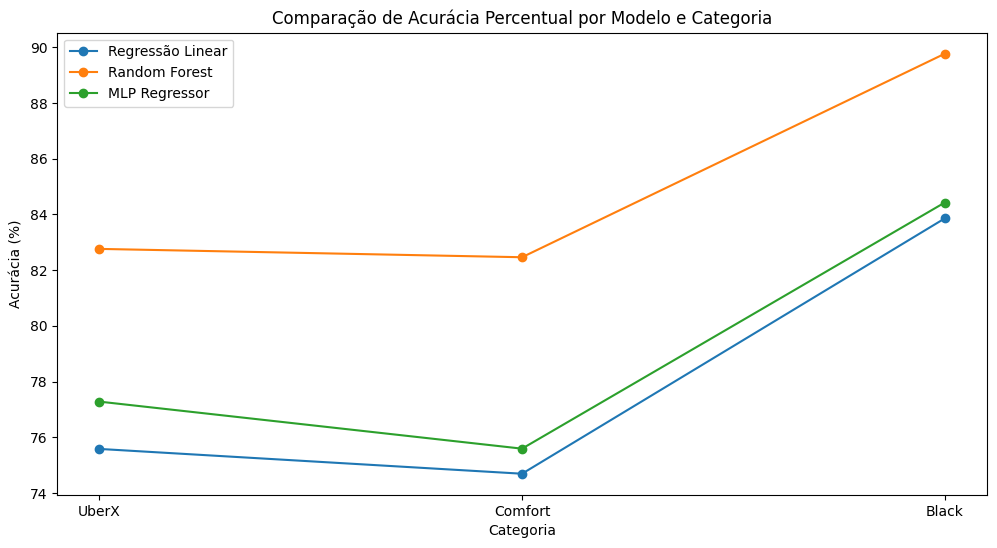

In [23]:
# Comparar as métricas de acurácia
model_names = ['Regressão Linear', 'Random Forest', 'MLP Regressor']
categories = uber_categories

# Comparação de acurácia para cada modelo por categoria
accuracy_comparison = {model: [results[cat][model]['accuracy'] for cat in categories] for model in model_names}

plt.figure(figsize=(12, 6))
for model_name, accuracy_values in accuracy_comparison.items():
    plt.plot(categories, accuracy_values, marker='o', label=model_name)

plt.title('Comparação de Acurácia Percentual por Modelo e Categoria')
plt.xlabel('Categoria')
plt.ylabel('Acurácia (%)')
plt.legend()
plt.show()

## 99

------- 99 -------- ProviderID = 3 -------
ProductID únicos: ['99POP' '99COMFORT' '99ENTREGA' '99ENTREGA MOTO' '99ENTREGAMOTO' '99PLUS'
 '99POUPA' '99TAXI ' '99TOP' 'comfort99' 'delivery99' 'delivery-moto99'
 'electric99' 'entrega-carreto' 'entrega-utility' 'entrega-van' 'moto99'
 'pop99' 'poupa99' 'REGULAR TAXI' 'regular-taxi' 'top99' 'turbo-taxi']

CategoryID únicos: [ 1  9 10  2  5  6]

Description únicos: ['99POP' '99COMFORT' '99ENTREGA' '99ENTREGA MOTO' '99ENTREGAMOTO' '99PLUS'
 '99POUPA' '99TAXI ' '99TOP' '99DELIVERY' '99DELIVERY MOTO'
 '99Electric-Pro' 'EntregaCarreto' 'EntregaUtility' 'EntregaVan' '99MOTO'
 'REGULAR TAXI' 'Táxi Comum' '99TAXI']

In [ ]:
"""# Função para tratar outliers
def tratar_outliers(df, colunas):
    """
    Remove outliers das colunas especificadas com base no intervalo interquartil (IQR).
    """
    df_out = df.copy()
    for coluna in colunas:
        Q1 = df_out[coluna].quantile(0.25)
        Q3 = df_out[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df_out = df_out[(df_out[coluna] >= limite_inferior) & (df_out[coluna] <= limite_superior)]
    return df_out

# Função para calcular a acurácia percentual média
def calcular_acuracia(y_real, y_previsto):
    """
    Calcula a acurácia percentual média para modelos de regressão.
    """
    acuracias = 1 - np.abs((y_real - y_previsto) / y_real)  # Evita divisão por zero
    acuracias = acuracias[y_real != 0]  # Remove valores onde y_real = 0
    return np.mean(acuracias) * 100  # Retorna a média em porcentagem

# Função para validação cruzada de R²
def validacao_cruzada_r2(modelo, X, y, cv=5):
    """
    Realiza validação cruzada para R² e retorna as métricas.
    """
    scores = cross_val_score(modelo, X, y, cv=cv, scoring='r2')
    return scores.mean(), scores.std()

# Função principal para validação cruzada e cálculo de outras métricas
def executar_validacao_cruzada(df, categories, features, target):
    """
    Executa validação cruzada para várias categorias e calcula MAE, RMSE, R² e Acurácia Percentual Média.
    """
    results_crossval = {}

    for category in categories:
        print(f"\n--- Validação cruzada para a categoria: {category} ---")

        # Filtrar dados para a categoria atual
        df_category = df[df['ProductID'] == category]

        # Remover outliers
        df_category = tratar_outliers(df_category, ['Price', 'distance_km', 'distance_pico'])

        # Verificar se há dados suficientes após tratamento
        if df_category.empty:
            print(f"Categoria {category} está vazia após tratamento de outliers. Ignorada.")
            continue

        # Divisão em X (features) e y (target)
        X = df_category[features]
        y = df_category[target]

        # Normalizar os dados
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)

        # Modelos
        modelos = {
            'Regressão Linear': LinearRegression(),
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
        }

        # Realizar validação cruzada e calcular métricas adicionais
        category_crossval_results = {}
        for nome_modelo, modelo in modelos.items():
            print(f"\nValidando {nome_modelo} na categoria {category}...")

            # R² médio com validação cruzada
            r2_mean, r2_std = validacao_cruzada_r2(modelo, X_scaled, y, cv=5)

            # Treinar e prever para cálculo de métricas adicionais
            modelo.fit(X_scaled, y)  # Treinamento no conjunto completo (sem divisão em treino/teste aqui)
            y_pred = modelo.predict(X_scaled)  # Previsões no conjunto completo

            # Calcular outras métricas
            mae = mean_absolute_error(y, y_pred)
            rmse = np.sqrt(mean_squared_error(y, y_pred))
            accuracy = calcular_acuracia(y, y_pred)

            print(f"{nome_modelo} - R² Médio: {r2_mean:.2f}, Desvio padrão: {r2_std:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, Acurácia: {accuracy:.2f}%")

            # Salvar resultados
            category_crossval_results[nome_modelo] = {
                'r2_mean': r2_mean,
                'r2_std': r2_std,
                'mae': mae,
                'rmse': rmse,
                'accuracy': accuracy
            }

        # Armazenar resultados da categoria
        results_crossval[category] = category_crossval_results

    return results_crossval

categories = ['pop99', 'comfort99', 'top99']
features = ['distance_km', 'distance_pico', 'distance_km_log']
target = 'Price'

results = executar_validacao_cruzada(df, categories, features, target)

# Exibir resultados gerais
for category, result in results.items():
    print(f"\n--- Resultados de validação cruzada para {category} ---")
    for modelo, metrics in result.items():
        print(f"{modelo} - R² Médio: {metrics['r2_mean']:.2f}, Desvio padrão: {metrics['r2_std']:.2f}, MAE: {metrics['mae']:.2f}, RMSE: {metrics['rmse']:.2f}, Acurácia: {metrics['accuracy']:.2f}%")"""

IndentationError: unexpected indent (3370198838.py, line 4)

In [24]:
# Função para tratar outliers
def tratar_outliers(df, colunas):
    df_out = df.copy()
    for coluna in colunas:
        Q1 = df_out[coluna].quantile(0.25)
        Q3 = df_out[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df_out = df_out[(df_out[coluna] >= limite_inferior) & (df_out[coluna] <= limite_superior)]
    return df_out

# Função para calcular a acurácia percentual média
def calcular_acuracia(y_real, y_previsto):
    """
    Calcula a acurácia percentual média (relative accuracy) para modelos de regressão.
    """
    acuracias = 1 - np.abs((y_real - y_previsto) / y_real)  # Evita divisão por zero
    acuracias = acuracias[y_real != 0]  # Remove valores onde y_real = 0
    return np.mean(acuracias) * 100  # Retorna a média em porcentagem

# Categorias da 99
categories_99 = ['pop99', 'comfort99', 'top99']
df_99 = df[df['ProductID'].isin(categories_99)]

# Features e Target
features = ['distance_km', 'distance_pico', 'effective_distance']
target = 'Price'

# Dicionário para salvar resultados
results = {}

# Loop por categoria
for category in categories_99:
    print(f"\n--- Treinando para a categoria: {category} ---")
    
    # Filtrar dados para a categoria atual
    df_category = df_99[df_99['ProductID'] == category]
    
    # Remover outliers
    df_category = tratar_outliers(df_category, ['Price', 'distance_km', 'distance_pico', 'effective_distance'])
    
    # Divisão em X (features) e y (target)
    X = df_category[features]
    y = df_category[target]
    
    # Normalizar os dados
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Separar em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Modelos
    modelos = {
        'Regressão Linear': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
    }
    
    # Avaliar modelos
    category_results = {}
    for nome_modelo, modelo in modelos.items():
        print(f"\nTreinando {nome_modelo} para {category}...")
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        
        # Métricas
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        accuracy = calcular_acuracia(y_test, y_pred)  # Calcular a acurácia percentual
        
        print(f"{nome_modelo} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, Acurácia: {accuracy:.2f}%")
        
        # Salvar resultados
        category_results[nome_modelo] = {
            'model': modelo,
            'mae': mae,
            'rmse': rmse,
            'r2': r2,
            'accuracy': accuracy
        }
    
    # Armazenar resultados da categoria
    results[category] = category_results


--- Treinando para a categoria: pop99 ---

Treinando Regressão Linear para pop99...
Regressão Linear - MAE: 6.46, RMSE: 9.25, R²: 0.52, Acurácia: 69.51%

Treinando Random Forest para pop99...
Random Forest - MAE: 5.03, RMSE: 8.17, R²: 0.62, Acurácia: 77.32%

Treinando MLP Regressor para pop99...
MLP Regressor - MAE: 6.44, RMSE: 9.20, R²: 0.52, Acurácia: 70.28%

--- Treinando para a categoria: comfort99 ---

Treinando Regressão Linear para comfort99...
Regressão Linear - MAE: 8.58, RMSE: 11.87, R²: 0.50, Acurácia: 66.34%

Treinando Random Forest para comfort99...
Random Forest - MAE: 6.37, RMSE: 10.08, R²: 0.64, Acurácia: 77.43%

Treinando MLP Regressor para comfort99...
MLP Regressor - MAE: 8.56, RMSE: 11.83, R²: 0.51, Acurácia: 66.77%

--- Treinando para a categoria: top99 ---

Treinando Regressão Linear para top99...
Regressão Linear - MAE: 10.57, RMSE: 14.53, R²: 0.79, Acurácia: 78.75%

Treinando Random Forest para top99...
Random Forest - MAE: 6.08, RMSE: 10.76, R²: 0.88, Acurácia

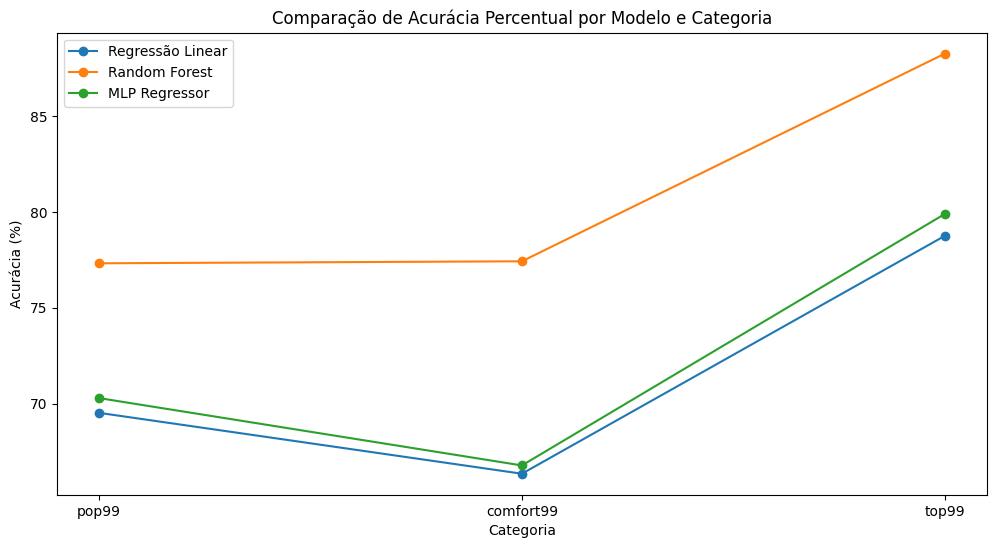

In [25]:
# Comparar as métricas de acurácia
model_names = ['Regressão Linear', 'Random Forest', 'MLP Regressor']
categories = categories_99

# Comparação de acurácia para cada modelo por categoria
accuracy_comparison = {model: [results[cat][model]['accuracy'] for cat in categories] for model in model_names}

plt.figure(figsize=(12, 6))
for model_name, accuracy_values in accuracy_comparison.items():
    plt.plot(categories, accuracy_values, marker='o', label=model_name)

plt.title('Comparação de Acurácia Percentual por Modelo e Categoria')
plt.xlabel('Categoria')
plt.ylabel('Acurácia (%)')
plt.legend()
plt.show()

Uber x 99

In [26]:
# Categorias relacionadas
uber_categories = ['UberX', 'Comfort', 'Black']
categories_99 = ['pop99', 'comfort99', 'top99']

# Modelos usados
model_names = ['Regressão Linear', 'Random Forest', 'MLP Regressor']

# Comparação de acurácia para Uber e 99
uber_accuracy = {model: [results[cat][model]['accuracy'] for cat in uber_categories] for model in model_names}
accuracy_99 = {model: [results[cat][model]['accuracy'] for cat in categories_99] for model in model_names}

# Configurar gráfico de comparação
plt.figure(figsize=(12, 6))

# Plotar acurácia para Uber
for model_name, accuracy_values in uber_accuracy.items():
    plt.plot(uber_categories, accuracy_values, marker='o', linestyle='-', label=f'Uber - {model_name}')

# Plotar acurácia para 99
for model_name, accuracy_values in accuracy_99.items():
    plt.plot(categories_99, accuracy_values, marker='x', linestyle='--', label=f'99 - {model_name}')

# Configuração do gráfico
plt.title('Comparação de Acurácia Percentual Média - Uber vs 99')
plt.xlabel('Categorias')
plt.ylabel('Acurácia (%)')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


KeyError: 'UberX'

## Próximos passos
- Validação Cruzada
- Outras Features
- Outros modelos
- Comparação: Uber x 99